In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sp-500-companies-with-financial-information/financials.csv


## Importing Python libraries for EDA

* numpy -- for numerical, array, matrices (Linear Algebra) processing
* pandas -- for loading and processing dataset
* matplotlib.pyplot -- for visualization
* Seaborn -- for statistical visualization
* Plotly.express -- for interactive visualization

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

## Importing the Dataset

In [5]:
data=pd.read_csv(r"/kaggle/input/sp-500-companies-with-financial-information/financials.csv")
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


## Printing First 10 data

In [6]:
data.head(10)

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.770,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.390,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.600,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.860,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.600,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
5,ATVI,Activision Blizzard,Information Technology,65.83,31.80,0.431903,1.28,74.945,38.930,5.251867e+10,2.704000e+09,10.595120,5.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
6,AYI,Acuity Brands Inc,Industrials,145.41,18.22,0.351185,7.43,225.360,142.000,6.242378e+09,5.878000e+08,1.795347,3.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,9.455021e+10,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
8,AAP,Advance Auto Parts,Consumer Discretionary,109.63,19.54,0.218321,6.19,169.550,78.810,8.123612e+09,8.539410e+08,1.130106,2.51,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,1.119166e+10,3.390000e+08,2.109195,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...


## Description of the Dataset - Rows & Columns

In [7]:
data.shape

(505, 14)

* There are 505 rows and 14 columns / features

## Description of the Dataset - Names of Columns

In [8]:
data.columns

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings'],
      dtype='object')

## Description of the Dataset - Datatypes in Columns

In [9]:
data.dtypes

Symbol             object
Name               object
Sector             object
Price             float64
Price/Earnings    float64
Dividend Yield    float64
Earnings/Share    float64
52 Week Low       float64
52 Week High      float64
Market Cap        float64
EBITDA            float64
Price/Sales       float64
Price/Book        float64
SEC Filings        object
dtype: object

* There are 10 numerical columns (Price, Price/Earnings, Dividend Yield, EPS, 52 week Low, 52 week High, Market cap, EBITDA, Price/sales, Price/Book) and one categorical columns (Sector)

## Displaying information about Dataset

* pandas.info() --> prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          505 non-null    object 
 1   Name            505 non-null    object 
 2   Sector          505 non-null    object 
 3   Price           505 non-null    float64
 4   Price/Earnings  503 non-null    float64
 5   Dividend Yield  505 non-null    float64
 6   Earnings/Share  505 non-null    float64
 7   52 Week Low     505 non-null    float64
 8   52 Week High    505 non-null    float64
 9   Market Cap      505 non-null    float64
 10  EBITDA          505 non-null    float64
 11  Price/Sales     505 non-null    float64
 12  Price/Book      497 non-null    float64
 13  SEC Filings     505 non-null    object 
dtypes: float64(10), object(4)
memory usage: 55.4+ KB


## Printing the description about the dataset

In [11]:
data.describe()

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
count,505.000000,503.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02,5.050000e+02,505.000000,497.000000
mean,103.830634,24.808390,1.895953,3.753743,122.623832,83.536616,4.923944e+10,3.590328e+09,3.941705,14.453179
std,134.427636,41.241081,1.537214,5.689036,155.362140,105.725473,9.005017e+10,6.840544e+09,3.460110,89.660508
min,2.820000,-251.530000,0.000000,-28.010000,6.590000,2.800000,2.626102e+09,-5.067000e+09,0.153186,0.510000
25%,46.250000,15.350000,0.794834,1.490000,56.250000,38.430000,1.273207e+10,7.739320e+08,1.629490,2.020000
50%,73.920000,19.450000,1.769255,2.890000,86.680000,62.850000,2.140095e+10,1.614399e+09,2.896440,3.400000
75%,116.540000,25.750000,2.781114,5.140000,140.130000,96.660000,4.511968e+10,3.692749e+09,4.703842,6.110000
max,1806.060000,520.150000,12.661196,44.090000,2067.990000,1589.000000,8.095080e+11,7.938600e+10,20.094294,1403.380000


## Checking Null Values

In [12]:
data.isnull().sum()

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64

* There are 2 null values in column Price/Earning(PE ratio) and 8 price/book value

## Printing missing rows in 'Price/Earnings' column

In [13]:
missing_rows_PE = data[data[['Price/Earnings']].isna().any(axis=1)]
print(missing_rows_PE)


    Symbol            Name                  Sector  Price  Price/Earnings  \
360   PRGO         Perrigo             Health Care  84.44             NaN   
430    TPR  Tapestry, Inc.  Consumer Discretionary  48.85             NaN   

     Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
360        0.731261          -28.01        95.93         63.68  1.232638e+10   
430        0.000000            2.09        50.71         36.69  1.424720e+10   

     EBITDA  Price/Sales  Price/Book  \
360     0.0     3.385007        2.03   
430     0.0     4.078549        4.35   

                                           SEC Filings  
360  http://www.sec.gov/cgi-bin/browse-edgar?action...  
430  http://www.sec.gov/cgi-bin/browse-edgar?action...  


* Row number 360 and 430 has a missing values in 'Price/Earnings' column

## Filling the missing values in 'Price/Earnings' column

In [14]:
data['Price/Earnings'] = data['Price/Earnings'].fillna(data['Price/Earnings'].mean())
print(data.isna().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
SEC Filings       0
dtype: int64


* Now, there is no missing values in 'Price/Book' column

## Printing missing rows in 'Price/Book' column

In [15]:
missing_rows_PB = data[data[['Price/Book']].isna().any(axis=1)]
print(missing_rows_PB)


    Symbol                  Name                  Sector   Price  \
55    ARNC           Arconic Inc             Industrials   24.45   
199     FL       Foot Locker Inc  Consumer Discretionary   45.88   
225    HCA          HCA Holdings             Health Care   95.97   
292    MRO    Marathon Oil Corp.                  Energy   15.68   
346    OXY  Occidental Petroleum                  Energy   68.47   
358    PEP          PepsiCo Inc.        Consumer Staples  110.15   
450    TDG       TransDigm Group             Industrials  283.00   
460    UNP         Union Pacific             Industrials  124.86   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
55            20.21        0.956175           -0.21        31.17   
199            9.50        2.582795            4.91        77.86   
225           14.07        1.422764            5.94       106.84   
292          -32.00        1.224740           -2.65        19.52   
346          195.63        4.408186           -

* Row number: 55,199,225,292,346,358,450,460 has missing values in 'Price/Book' column

## Filling the missing values in 'Price/Book' column

In [16]:
data['Price/Book'] = data['Price/Book'].fillna(data['Price/Book'].mean())
print(data.isna().sum())

Symbol            0
Name              0
Sector            0
Price             0
Price/Earnings    0
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        0
SEC Filings       0
dtype: int64


* Now, there is no missing values in 'Price/Book' column

## Dropping 'SEC Filings' column which was not useful for analysis

In [17]:
data.drop(columns=['SEC Filings'], inplace=True)
data

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


* Succesfully dropped the 'SEC Filings' column from the dataset

## Formatting the Market cap and EBITDA into float type

In [18]:
# Define a custom formatting function
def format_float(val):
    if val >= 1e9:
        return f'{val / 1e9:.2f}'  # Convert to billions
    elif val >= 1e6:
        return f'{val / 1e6:.2f}'  # Convert to millions
    else:
        return f'{val:.2f}'

# Apply the custom formatting function to the specified columns
data['Market Cap'] = data['Market Cap'].apply(format_float)
data['EBITDA'] = data['EBITDA'].apply(format_float)

print(data)

    Symbol                    Name                  Sector   Price  \
0      MMM              3M Company             Industrials  222.89   
1      AOS         A.O. Smith Corp             Industrials   60.24   
2      ABT     Abbott Laboratories             Health Care   56.27   
3     ABBV             AbbVie Inc.             Health Care  108.48   
4      ACN           Accenture plc  Information Technology  150.51   
..     ...                     ...                     ...     ...   
500    XYL              Xylem Inc.             Industrials   70.24   
501    YUM         Yum! Brands Inc  Consumer Discretionary   76.30   
502    ZBH  Zimmer Biomet Holdings             Health Care  115.53   
503   ZION           Zions Bancorp              Financials   50.71   
504    ZTS                  Zoetis             Health Care   71.51   

     Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
0             24.31        2.332862            7.92       259.77   
1             27.76    

* Successfully format the values in the dataset to float values 

# Data Visualization

## Sunburst chart for representing Sector based on Market Cap

In [19]:
fig = px.sunburst(data, path=['Sector', 'Name','Price/Earnings','Price/Book','EBITDA'], values='Market Cap')
fig.update_layout(width=800, height=600)
fig.show()

* Sunburst chart where the sectors are represented as the outer rings and the company names are represented as inner rings. The size of each segment is determined by the 'Market Cap' column.

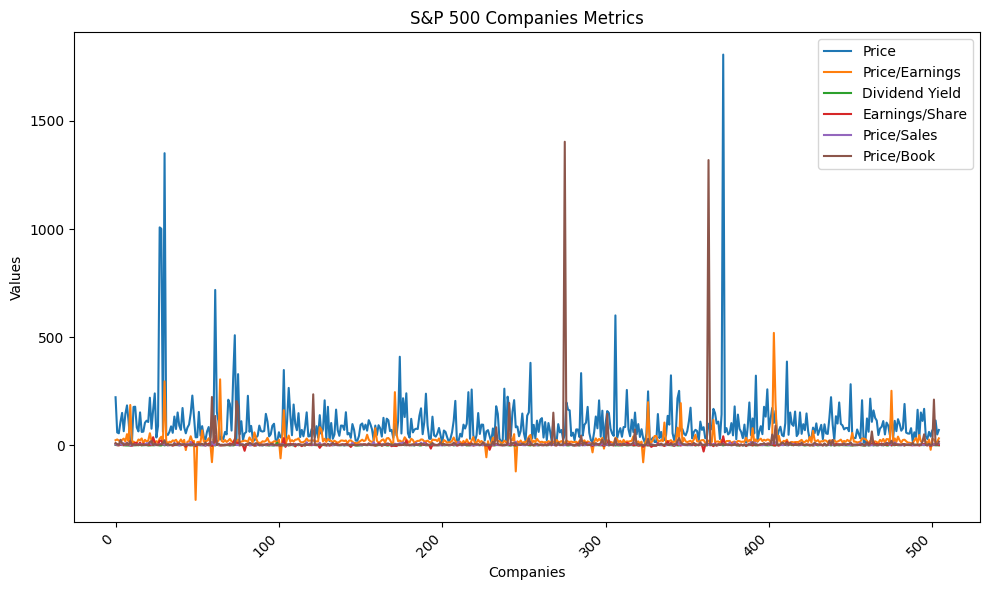

In [20]:
# Select the columns for the line plot
columns_to_plot = ['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', 'Price/Sales', 'Price/Book']

# Create the line plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
for column in columns_to_plot:
    plt.plot(data.index, data[column], label=column)

# Add title and labels
plt.title('S&P 500 Companies Metrics')
plt.xlabel('Companies')
plt.ylabel('Values')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

## Earning per share based on Sector-wise using barplot

<Axes: xlabel='Sector', ylabel='Earnings/Share'>

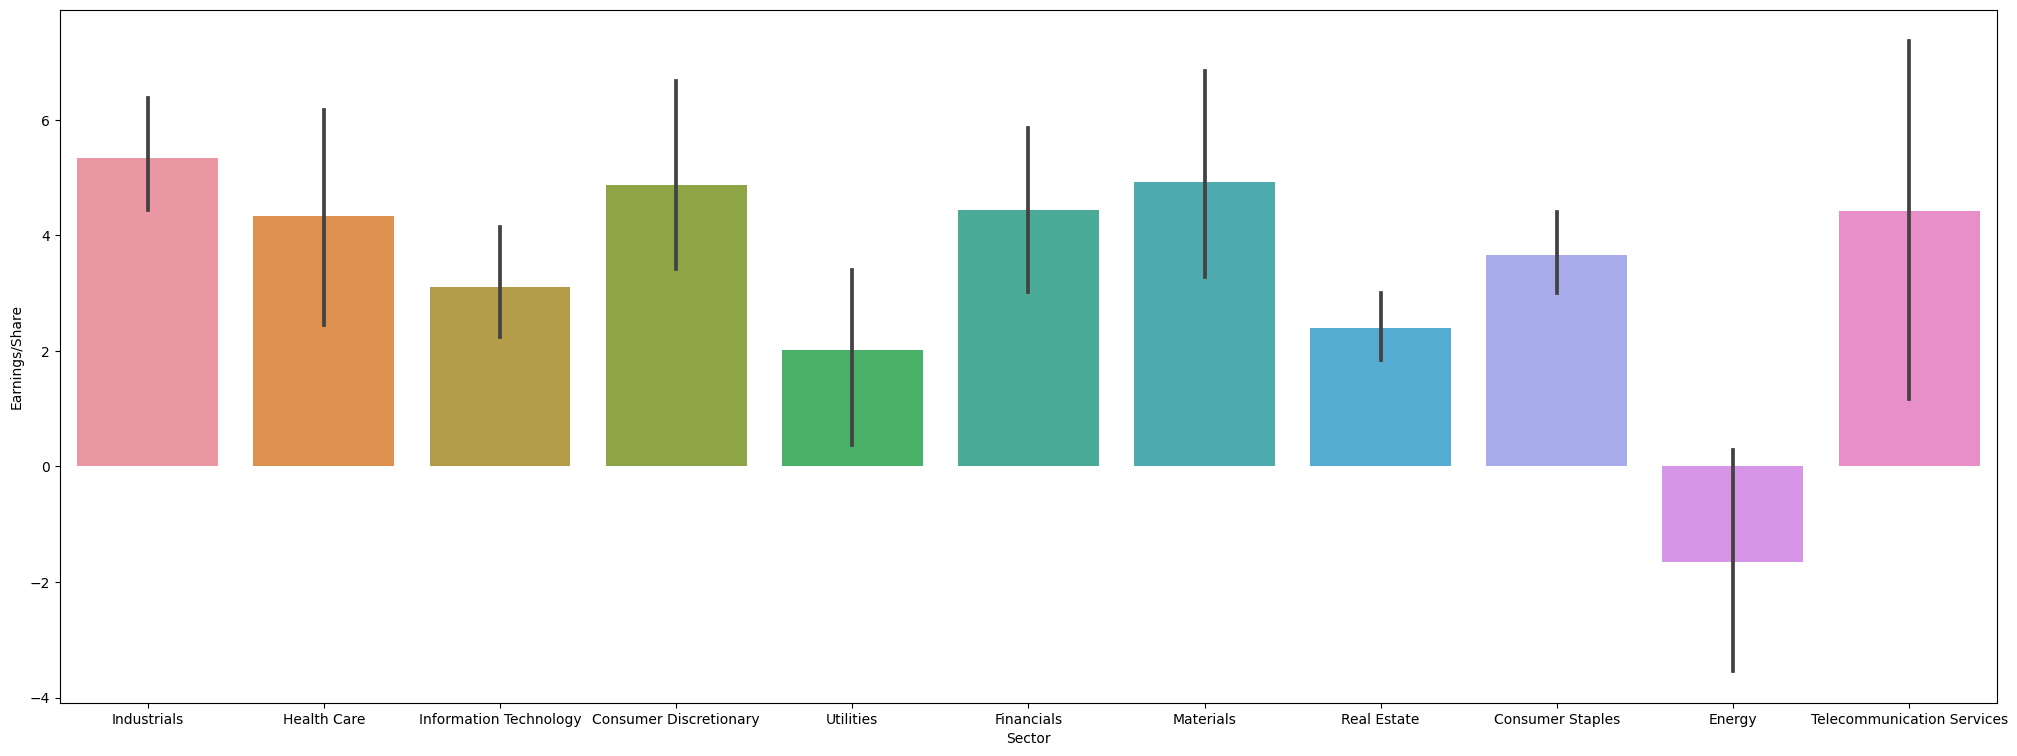

In [21]:
fig=plt.figure(figsize=(25,9))
sns.barplot(x='Sector',y='Earnings/Share',data=data)

* It represent sector-wise based on Earning per Share which helps investor to invest in specific Sector for better returns.

## CountPlot: It represent the number of companies in different Sectot

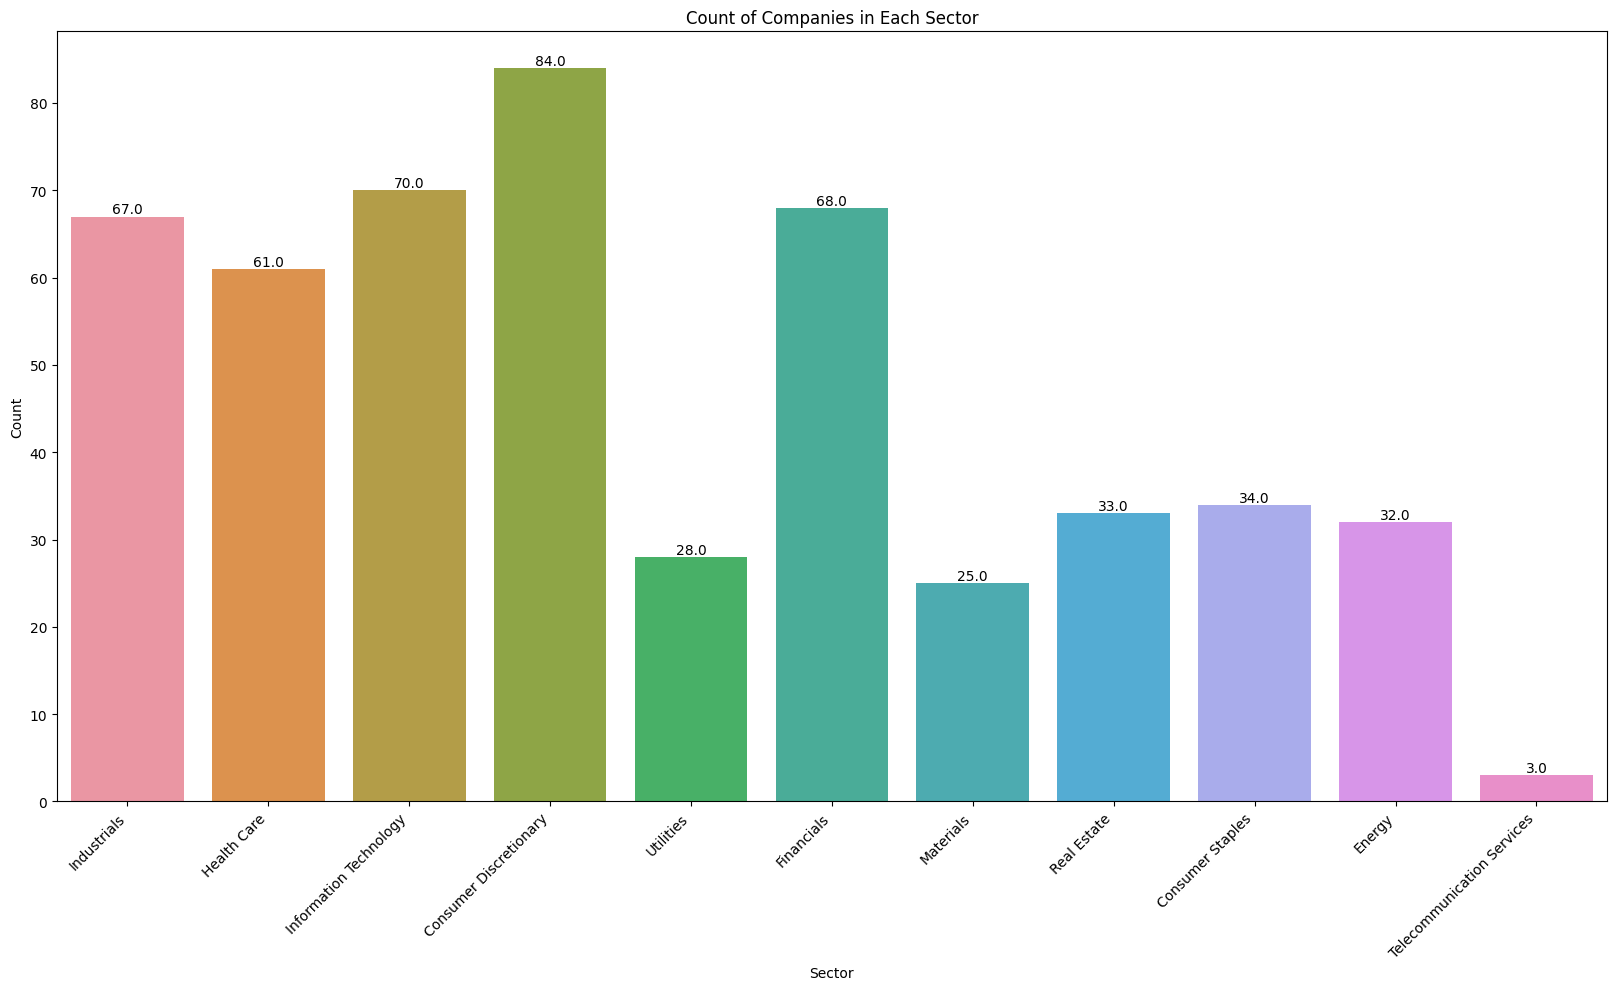

In [22]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Create the countplot
ax=sns.countplot(x='Sector', data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and labels
plt.title('Count of Companies in Each Sector')
plt.xlabel('Sector')
plt.ylabel('Count')

# Show plot
plt.show()

* countplot of the number of companies in each sector and annotates each bar with the respective count.

## Correlation of different financials using Heatmap

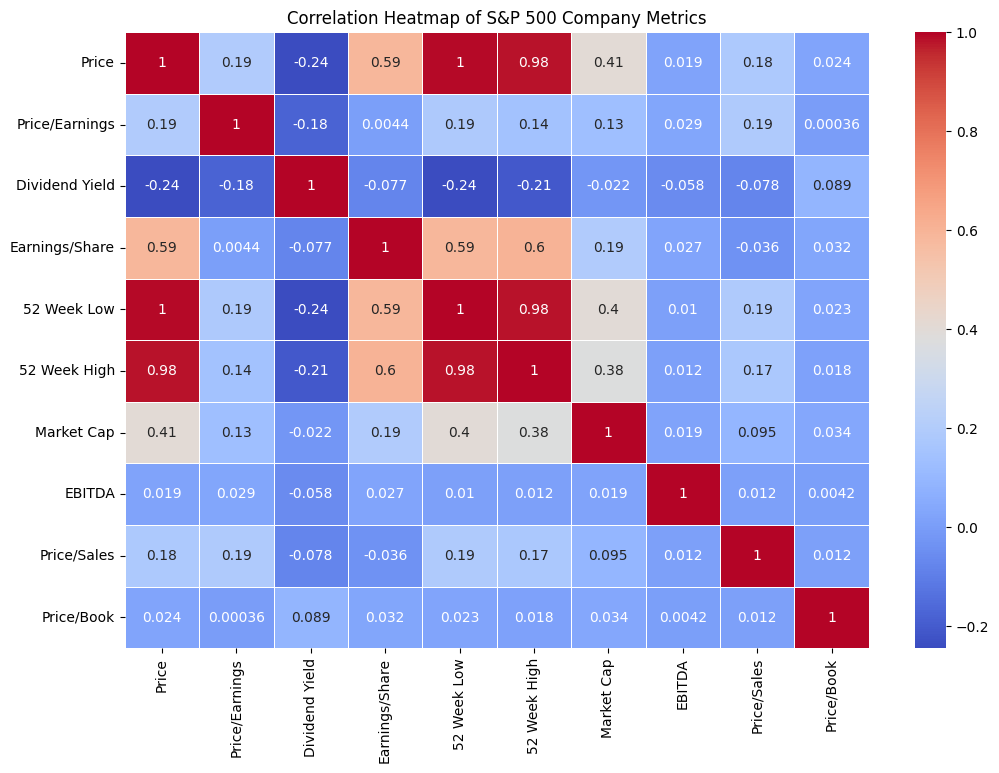

In [23]:
# Subset the DataFrame to include only the required columns for the heatmap
heatmap_data = data[['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', 
                     '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
                     'Price/Sales', 'Price/Book']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of S&P 500 Company Metrics')
plt.show()

* Heatmap showing the correlation between the selected financial metrics for S&P 500 companies. 

# Data Exploration with Parametric method
### Descriptive Statistics

In [24]:
# Filter the dataset
relevant_columns = ['Sector', 'Price', 'Dividend Yield']
filtered_data = data[relevant_columns]

# Group by 'Sector' and calculate descriptive statistics
descriptive_stats = filtered_data.groupby('Sector').describe()

# Print the descriptive statistics
print("\nDescriptive statistics:")
print(descriptive_stats)


Descriptive statistics:
                           Price                                          \
                           count        mean         std    min      25%   
Sector                                                                     
Consumer Discretionary      84.0  124.034524  249.466971  10.43  39.7525   
Consumer Staples            34.0   79.764118   41.731894  19.96  49.0325   
Energy                      32.0   57.887500   38.683557   2.82  28.2950   
Financials                  68.0   89.056029   73.949182  13.38  48.3275   
Health Care                 61.0  132.515738   98.048981  25.20  71.5100   
Industrials                 67.0  116.887612   79.320826  14.45  60.3000   
Information Technology      70.0  119.242857  162.608472  11.22  46.9900   
Materials                   25.0  102.386800   75.450302  17.16  56.0500   
Real Estate                 33.0   88.712727   77.537399  14.01  38.2100   
Telecommunication Services   3.0   33.603333   16.508096  16.20

* It will provide descriptive statistics (mean, standard deviation, minimum, maximum, etc.) for the 'Price' and 'Dividend Yield' columns within each sector of the dataset.

## Performing T-test between means of Information technology and Financials

## Assummption

#### Null Hypothesis (H0): There is no significant difference in the average prices between the Information Technology sector and Financials sector.

#### Alternative Hypothesis (H1): There is a significant difference in the average prices between the Information Technology sector and Financials sector.

In [30]:
# Level of Significance
Alpha = 0.05

# Select two sectors for comparison
sector1 = 'Information Technology'
sector2 = 'Financials'

# Filter the dataset to include only the relevant columns and sectors
relevant_columns = ['Sector', 'Price']
filtered_data = data[relevant_columns]

# Separate the 'Price' data for the two selected sectors
prices_sector1 = filtered_data[filtered_data['Sector'] == sector1]['Price']
prices_sector2 = filtered_data[filtered_data['Sector'] == sector2]['Price']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(prices_sector1, prices_sector2)

# Print the results
print("\nT-test results for 'Price' between", sector1, "and", sector2, "sectors:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("Alpha:", Alpha )


T-test results for 'Price' between Information Technology and Financials sectors:
T-statistic: 1.396832278335614
P-value: 0.16473919387276054
Alpha: 0.05


* Since the p-value (0.1647) is greater than the significance level (0.05), we accept the null hypothesis.

## Performing Q-Q plot using Scipy on Dividend Yield

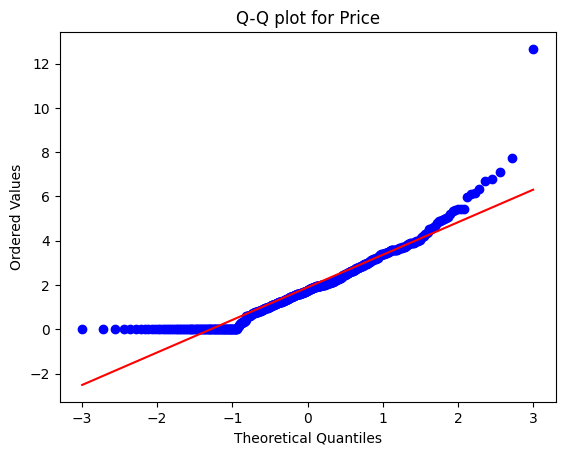

In [51]:
# Extract data for the 'Dividend Yield' column
dividend_data = data['Dividend Yield']

# Generate Q-Q plot
stats.probplot(dividend_data, dist="norm", plot=plt)
plt.title("Q-Q plot for Price")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()

## Parametric modeling - Example: Fitting a normal distribution to Price/sales

In [75]:
# Extract data for the 'Price' column
price_per_sales_data = data['Price/Sales']

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(price_per_sales_data)

# Print parameters of the fitted normal distribution
print("\nParameters of the fitted normal distribution for Price per sales:")
print("Mean (mu):", mu)
print("Standard deviation (sigma):", sigma)


Parameters of the fitted normal distribution for Price per sales:
Mean (mu): 3.941705097683168
Standard deviation (sigma): 3.4566826727208735


## Plot histogram and fitted normal distribution

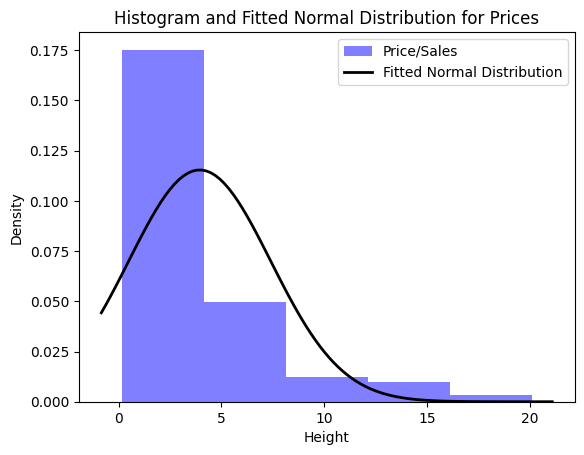

In [79]:
plt.hist(price_per_sales_data, bins=5, density=True, alpha=0.5, color='b', label='Price/Sales')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')
plt.xlabel('Height')
plt.ylabel('Density')
plt.title('Histogram and Fitted Normal Distribution for Prices')
plt.legend()
plt.show()

* plt.hist(price_per_sales_data, bins=5, density=True, alpha=0.5, color='b' label='Prices/Sales')

* This line of code creates a histogram of the Prices/Sales.

* It plots the distribution of Prices/Sales using a histogram with 5 bins.

* The density=True parameter normalizes the histogram so that the area under the histogram equals 1, making it a probability density function.

* The alpha=0.5 parameter controls the transparency of the histogram bars, and color='g' sets the color to green. Finally, label='Female Heights' assigns a label to the histogram for use in the legend.

* xmin, xmax = plt.xlim() x = np.linspace(xmin, xmax, 100) p = stats.norm.pdf(x, mu, sigma)

* These lines of code calculate the probability density function (PDF) of the fitted normal distribution for Prices/sales.

* It generates 100 equally spaced points (x) between the minimum and maximum observed Prices/Sales (xmin and xmax).

* Then, it computes the PDF (p) of the normal distribution with mean mu and standard deviation sigma at these points using stats.norm.pdf() from SciPy.

* plt.plot(x, p, 'k', linewidth=2, label='Fitted Normal Distribution')

* This line of code plots the fitted normal distribution on the same plot as the histogram. It uses plt.plot() to draw a line plot of the PDF (p) against the Prices/Sales values (x). The 'k' argument sets the line color to black, and linewidth=2 adjusts the line width. The label='Fitted Normal Distribution' assigns a label to this line for use in the legend.

## Output Explanation:

* The output of the code is a plot that consists of a histogram representing the distribution of Prices/Sales and a line plot representing the fitted normal distribution.

* The histogram shows the frequency or density of Prices/Sales in different companies ranges, while the fitted normal distribution provides an approximation of the underlying probability distribution of Prices/Sales assuming it follows a normal (Gaussian) distribution.

* The plot allows visual comparison between the observed data and the fitted distribution, which can help assess how well the normal distribution fits the data.